file_list: ['티파니.jpg', '온앤오프효진.jpg', '권현빈.jpg', '미미.jpg', '채연.jpg', '솔라.jpg', '박나래.jpeg', '크리스탈.jpg', '트와이스모모.jpeg', '류진.jpg', '태연.jpg', '레드벨벳웬디.jpg', '레인보우재경.jpg', '도아.jpeg', '카이.jpg', '승희.jpeg', '로제.jpg', '아린.jpg', 'biden.jpg', '지호.jpg', '유리.jpg', '지수.jpg', '김유정.jpg', 'b1a4진영.jpeg', '시우민.jpg', '제니.jpg', '첸.jpg', '태양.jpeg', 'clinton.jpeg', '유아.jpg', '윤아.jpg', '민니.jpg', '손예진.jpeg', '지코.jpg', '지디.jpg', '여자아이들수진.jpeg', '우기.jpg', '김남주.jpeg', '박보영.jpg', '전소미.jpg', '리아.jpg', '아이즈원김채원.jpg', '강미나.jpg', '잇지예지.jpeg', '아이즈원민주.jpg', '수호.jpg', '아이즈원조유리.jpeg', '이효리.jpg', '박진영.jpeg', '디오.jpeg', '서현진.jpg', '트와이스정연.jpg', '장도연.jpg', '세훈.jpg', '트와이스나연.jpg', '러블리즈지수.jpeg', '아이유.jpg', '조이.jpg', '산들.jpeg', '신비.jpg', 'trump.jpg', '김고은.jpeg', '트와이스쯔위.jpg', 'bush.jpeg', '트와이스미나.jpg', '사쿠라.jpg', '슬기.jpg', '잇지유나.jpg', '문별.jpg', '공효진.jpg', '백현.jpg', '온앤오프와이엇.jpg', '효정.jpg', '트와이스다현.jpeg', '찬열.jpeg', '온앤오프라운.jpg', '강민경.jpg', '장원영.jpeg', '케이.jpg', '나인뮤지스경리.jpg', '비니.jpg', '트와이스사나.jpg', '한효주.jpg', '러블리즈예인.jpg', 'ob

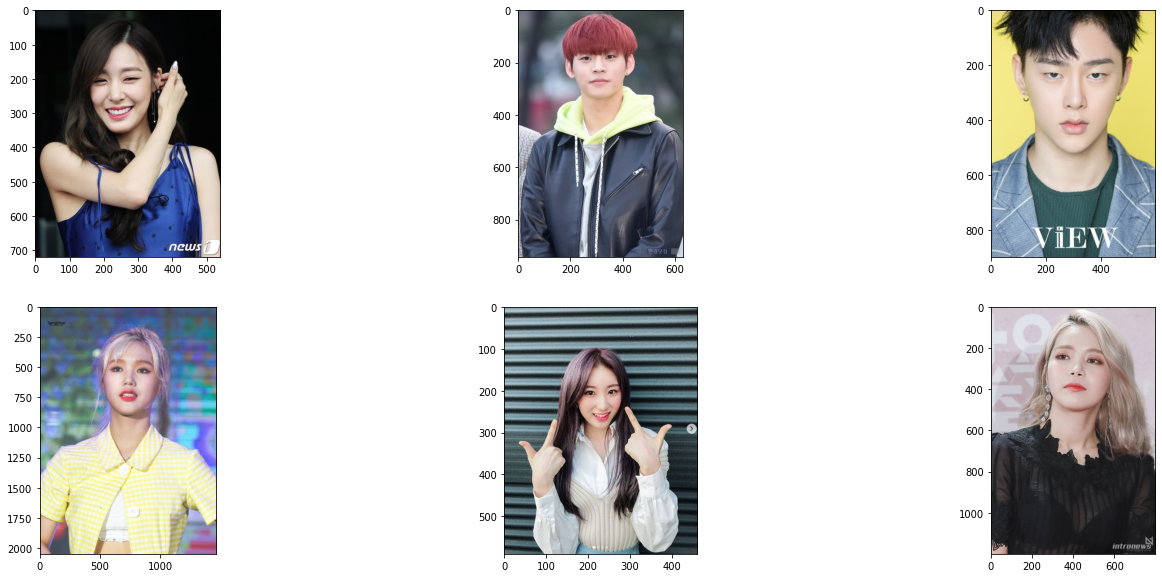

In [17]:
# https://www.notion.so/modulabs/df8ad72b9e2b4c75914f1060d7ea64e2  로 부터 이미지를 가져옴(바롬님이 제공)


import os
import tensorflow as tf
import numpy as np

dir_path = os.getenv('HOME')+'/aiffel/face/images'
# dir_path = "/content/gdrive/MyDrive/aiffel/workplace/GD"
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

import matplotlib.pyplot as plt
import matplotlib.image as img

#Set figsize here
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

In [18]:
import face_recognition
import os
import numpy as np
import matplotlib.pyplot as plt

### 얼굴영역만 뿌려주는 함수 만들기
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    if face_locations:
        a, b, c, d = face_locations[0]
        cropped_face = image[a:c,d:b,:]
        return cropped_face
#     else:
#         return []    

[(98, 758, 284, 572)]


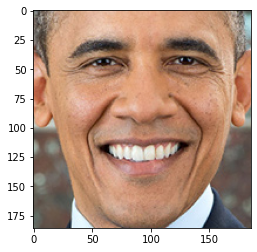

In [19]:
import face_recognition
import os
%matplotlib inline
import matplotlib.pyplot as plt

image_path = os.getenv('HOME')+'/aiffel/face/images/obama.jpg'


image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

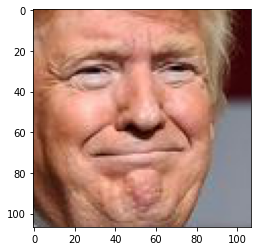

In [20]:
# 트럼프 얼굴로 테스트.
image_path = os.getenv('HOME')+'/aiffel/face/images/trump.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

In [21]:
# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
  return face_recognition.face_encodings(face)

embedding = get_face_embedding(cropped_face)  
embedding

# embedding dict 만드는 함수
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    cropped_dict = {}

    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        if face == []:
            continue
        embedding = get_face_embedding(face)
        if len(embedding) > 0:
            # splitext = file, extension
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
            cropped_dict[os.path.splitext(file)[0]] = face

    return embedding_dict, cropped_dict

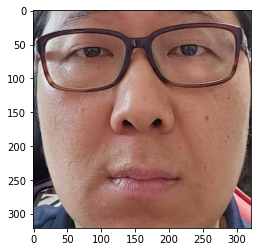

In [22]:
# 임베딩 벡터 구하기
image_file = os.path.join(dir_path, 'djy.jpg')
cropped_face = get_cropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 이미지 확인
%matplotlib inline

plt.imshow(cropped_face)

In [23]:
# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
  return face_recognition.face_encodings(face)

embedding = get_face_embedding(cropped_face)  
embedding

# embedding dict 만드는 함수
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    cropped_dict = {}

    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        if face == []:
            continue
        embedding = get_face_embedding(face)
        if len(embedding) > 0:
            # splitext = file, extension
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
            cropped_dict[os.path.splitext(file)[0]] = face

    return embedding_dict, cropped_dict

In [26]:
# embedding_dict 만들기
embedding_dict, cropped_dict = get_face_embedding_dict(dir_path)
embedding_dict['djy']

# 두 얼굴 사이의 거리 구하기
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

# 내 사진으로 비교
get_distance('djy','djy1')

# name1과 name2의 거리를 비교하는 함수
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

# 거리를 비교할 name1 미리 지정
sort_key_func = get_sort_key_func('djy')

# 순위에 맞는 이미지 출력
def get_nearest_face_images(sorted_faces, top=5):
    fig = plt.figure(figsize=(15, 5))
    fig.add_subplot(2, top, 1)
    plt.imshow(cropped_dict[sorted_faces[0][0]])
    for i in range(1, top+1):
        fig.add_subplot(2, top, i+5)
        plt.imshow(cropped_dict[sorted_faces[i][0]])

# 가장 닮은 꼴 찾기
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0:
            continue
        if sorted_faces[i]:
            print(f'순위 {i} : 이름 ({sorted_faces[i][0]}), 거리({sort_key_func(sorted_faces[i][0])})')
    return sorted_faces

# 순위 출력
sorted_faces = get_nearest_face('djy')

/tmp/ipykernel_49/4142919832.py:17: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if face == []:


TypeError: __call__(): incompatible function arguments. The following argument types are supported:
    1. (self: _dlib_pybind11.fhog_object_detector, image: array, upsample_num_times: int=0) -> _dlib_pybind11.rectangles

Invoked with: <_dlib_pybind11.fhog_object_detector object at 0x7f0dc472d830>, None, 1